# PHP - Pulsating Heat Pipe [DI, 40FR, Atm]

In [23]:
from analysis import PulseHeatPipe
from analysis import DataVisualisation

In [24]:
analysis = PulseHeatPipe("data/di_water_exp_atm/40_FR/")

Data loaded from directory: data/di_water_exp_atm/40_FR/


In [25]:
df, df_conv = analysis.data_etl()

Compiled and converted data is saved at: data/di_water_exp_atm/40_FR/'combined_converted_data.csv'


In [26]:
df_gfe = analysis.gibbs_fe(df_conv)

Gibbs Free Energy calculated data saved at: data/di_water_exp_atm/40_FR/'gfe_combined.csv


In [27]:
df_gfe

,t(min),Te[K],Tc[K],dT[K],P[bar],TR[K/W],GFE[KJ/mol],GFE_Tc[KJ/mol],dG[KJ/mol]
0,0.0,292.15,292.15,0.00,1.013250,0.000000,31.971012,31.971012,0.000000
1,0.5,292.15,292.15,0.00,1.013250,0.000000,31.971012,31.971012,0.000000
2,1.0,292.15,291.90,0.25,1.013250,0.003125,31.971012,31.943654,0.027358
3,1.5,292.82,291.40,1.42,1.013250,0.017708,32.044333,31.888937,0.155396
4,2.0,294.15,291.90,2.25,1.013250,0.028125,32.189880,31.943654,0.246225
...,...,...,...,...,...,...,...,...,...
96,48.0,366.15,333.15,33.00,1.797185,0.412500,1784.558310,1623.721428,160.836882
97,48.5,365.82,332.90,32.92,1.797185,0.411458,1782.949941,1622.502967,160.446974
98,49.0,365.82,332.40,33.42,1.797185,0.417708,1782.949941,1620.066045,162.883897
99,49.5,365.82,331.90,33.92,1.797185,0.423958,1782.949941,1617.629122,165.320819


In [28]:
visual = DataVisualisation('DI_WATER_40FR_Atm')

Data loaded from directory: DI_WATER_40FR_Atm


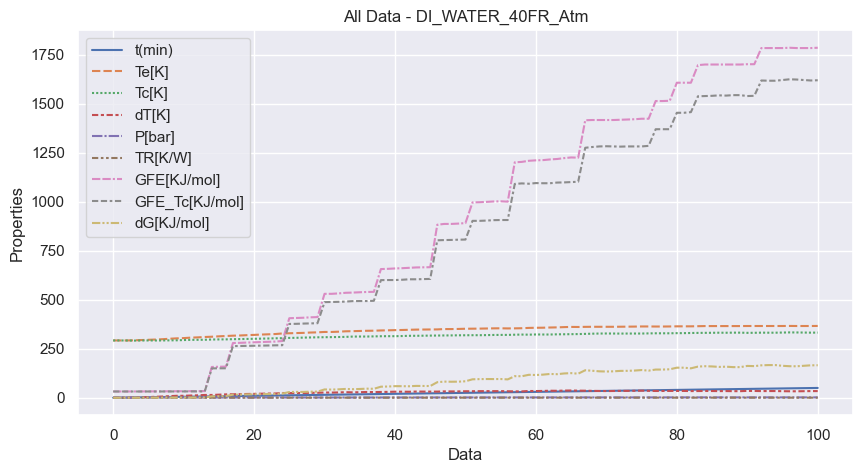

In [29]:
visual.plot_all_data(df_gfe)

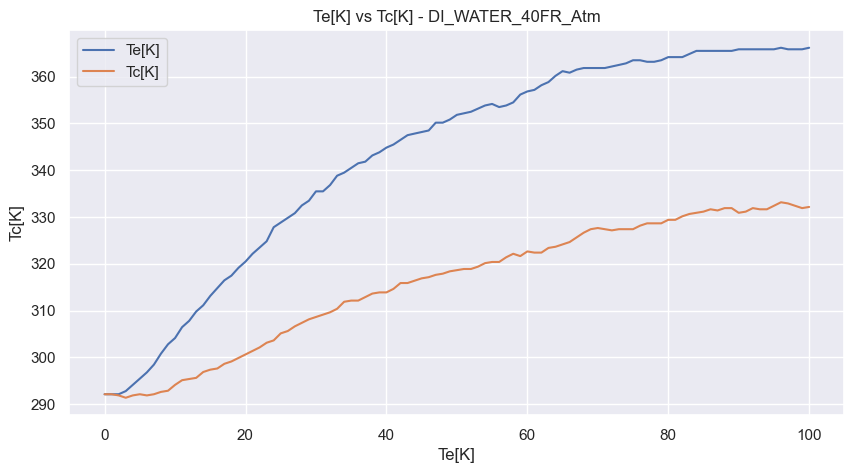

In [30]:
visual.plot_Te_Tc(df_gfe)

In [31]:
df_selected =  analysis.data_chop(df_gfe)    

Optimal range of temperature(Te) for data selection: [Tmin:292.15, Tmax:366]


In [32]:
df_mean, df_std = analysis.data_stat(df_selected)

Calculated mean and standard deviation values saved at data/di_water_exp_atm/40_FR/'combined_mean.csv' and 'combined_std.csv'


In [33]:
df_mean

,Te[K],t(min),Tc[K],dT[K],P[bar],TR[K/W],GFE[KJ/mol],GFE_Tc[KJ/mol],dG[KJ/mol]
0,300.82,4.000000,292.650000,8.170000,1.013250,0.102083,32.919801,32.025729,0.894072
1,302.82,4.500000,292.900000,9.920000,1.013250,0.123958,33.138669,32.053088,1.085581
2,304.15,5.000000,294.150000,10.000000,1.013250,0.125000,33.284215,32.189880,1.094336
3,306.48,5.500000,295.150000,11.330000,1.013250,0.141667,33.539195,32.299313,1.239882
4,307.82,6.000000,295.400000,12.420000,1.013250,0.155208,33.685836,32.326672,1.359165
...,...,...,...,...,...,...,...,...,...
63,364.15,40.500000,329.650000,34.500000,1.699859,0.431250,1606.249634,1454.071651,152.177983
64,364.82,41.500000,330.650000,34.170000,1.749189,0.427083,1695.971771,1537.122598,158.849173
65,365.48,43.250000,331.483333,33.996667,1.749189,0.425000,1699.039973,1540.996590,158.043383
66,365.82,47.166667,331.872222,33.947778,1.786519,0.424305,1764.654524,1600.938490,163.716033


In [34]:
analysis.data_property_avg(df_mean, df_std)

Tc  average:     313.8904 +- 0.4655 [K]
P   average:     1.3234 +- 0.0119 [bar]
dT  average:     27.9902 +- 0.4655 [K]
TR  average:     0.3499 +- 0.0058 [K/W]
GFE average:     782.4421 +- 23.0384 [KJ/mol]



In [35]:
analysis.best_TP(df_mean)

Optimal G(T,P) condition at lowest (optimal) dG[0.8941]
Te optimal:        300.82[K] 
P  optimal:        1.0132[bar] 
dT optimal:        8.17[K] 
TR optimal:        0.1021[K/W] 
GFE optimal:       dG(300.82, 1.0132) = 32.9198 [KJ/mol]



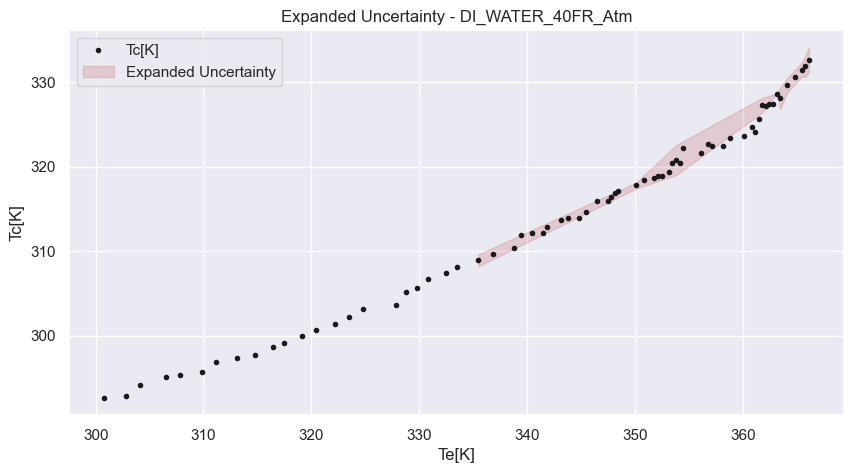

In [36]:
visual.plot_eu(df_mean, df_std, 'Tc[K]')

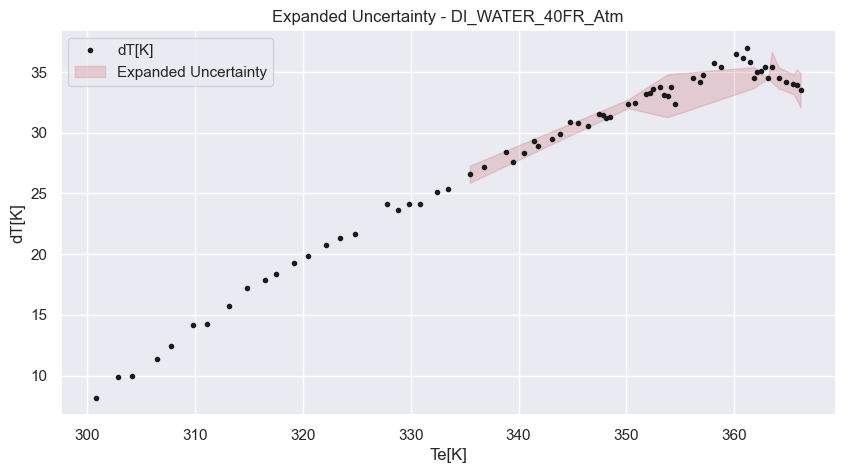

In [37]:
visual.plot_eu(df_mean, df_std, 'dT[K]')

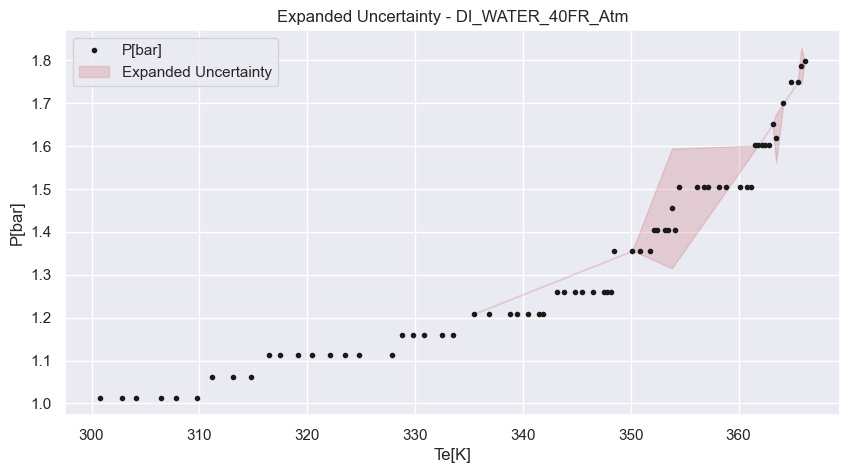

In [38]:
visual.plot_eu(df_mean, df_std, 'P[bar]')

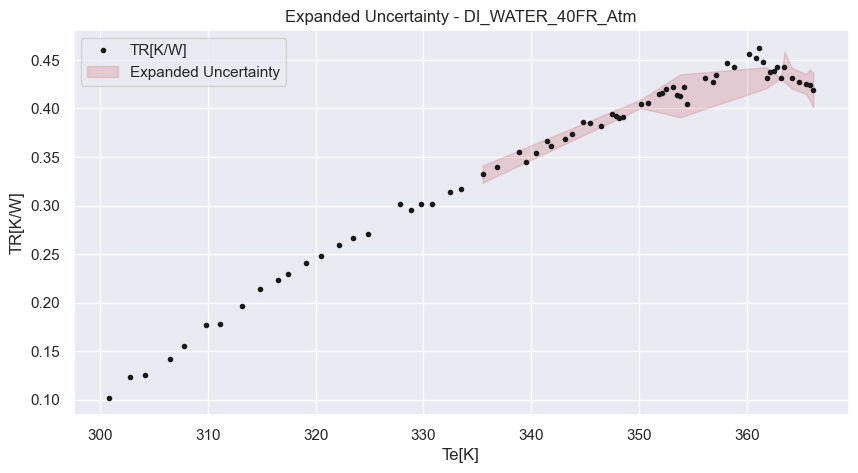

In [39]:
visual.plot_eu(df_mean, df_std, 'TR[K/W]')

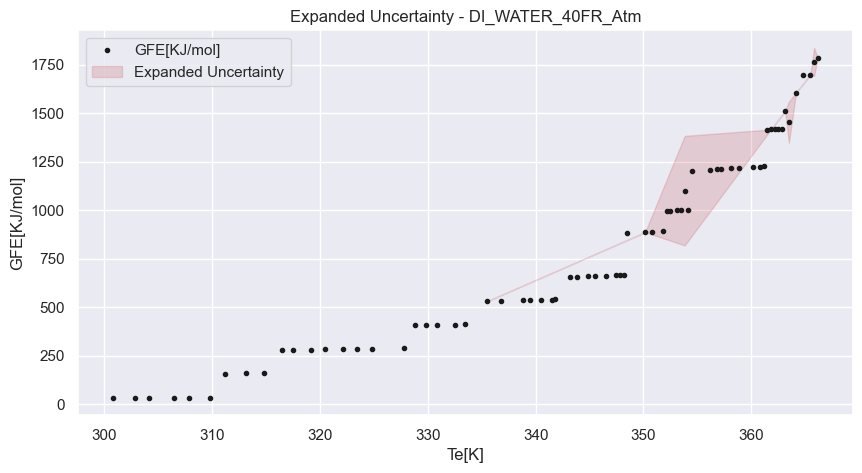

In [40]:
visual.plot_eu(df_mean, df_std, 'GFE[KJ/mol]')

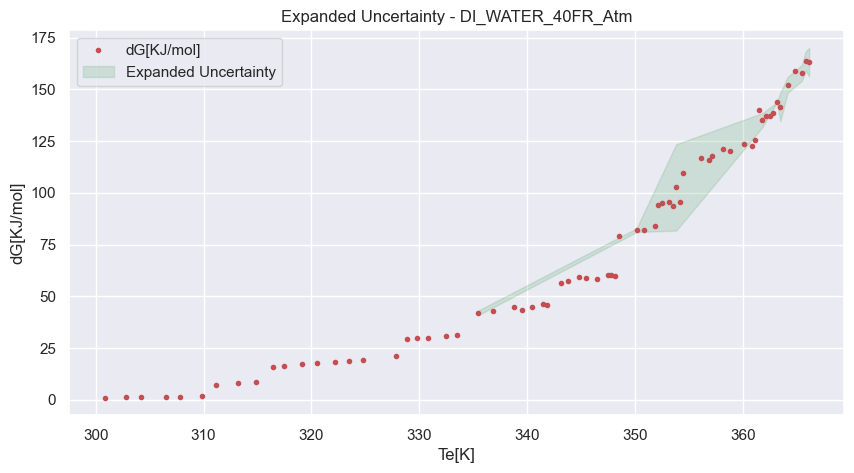

In [41]:
visual.plot_eu(df_mean, df_std, 'dG[KJ/mol]','.r','g')